In [33]:
# Imports

import TickLoader
import numpy as np
import pandas as pd
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import get_ipython
import matplotlib.mlab as mlab
import itertools 


In [34]:
# Inputs

hrs=['02:30:01','10:59:59']     # sugar: ['02:30:01','10:59:59']    coffee: ['03:15:01','12:29:59']  cocoa: ['03:30:01','11:54:59']
start_datetime = '2017-12-01 '+hrs[0]
end_datetime = '2017-12-01 '+hrs[1]
symbols=['SB  FMH0018-SB  FMK0018']  #['KC  FMH0018-KC  FMK0018'] 



In [35]:
# Data pull

Raw_data=TickLoader.raw_ticks_dataframe(symbols[0], start_datetime, end_datetime,books_type='direct')

data = Raw_data.drop(['symbol','instrumentId'], 1)
data=data.dropna(axis=0,subset=['bid_price','ask_price'],how='any')
data['trade_size'].fillna(0, inplace=True)


In [36]:
#compute Liquidity taking

# Hitting:
data['Hitting']=0
data['Hitting'][(data['trade_size'] > 0) & (data['trade_price']==data['bid_price'])] = data['trade_size']
data['bid_moved'] = (data.bid_price.shift() != data.bid_price)

data['CumulativeHittingRaw']=0
data['CumulativeHittingRaw'] = data['Hitting'].cumsum()

data['CumulativeHittingSteps']=np.nan
data['CumulativeHittingSteps'][0]=0
data['CumulativeHittingSteps'][data.bid_moved] = data['CumulativeHittingRaw']
data['CumulativeHittingSteps']=data['CumulativeHittingSteps'].ffill()

data['CumulativeHitting'] = data['CumulativeHittingRaw']-data['CumulativeHittingSteps']

# we could use <= instead of ==

# Lifting:
data['Lifting']=0
data['Lifting'][(data['trade_size'] > 0) & (data['trade_price']==data['ask_price'])] = data['trade_size']
data['ask_moved'] = (data.ask_price.shift() != data.ask_price)

data['CumulativeLiftingRaw']=0
data['CumulativeLiftingRaw']=data['Lifting'].cumsum()

data['CumulativeLiftingSteps']=np.nan
data['CumulativeLiftingSteps'][0]=0
data['CumulativeLiftingSteps'][data.ask_moved] = data['CumulativeLiftingRaw']
data['CumulativeLiftingSteps']=data['CumulativeLiftingSteps'].ffill()

data['CumulativeLifting'] = data['CumulativeLiftingRaw']-data['CumulativeLiftingSteps']


# back_forth:
data['back_forth']=data[['CumulativeLifting','CumulativeHitting']].min(axis=1)




/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/local/TMG/samuel.kalt/anacond

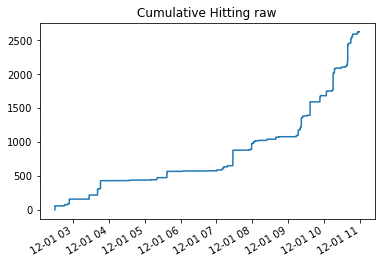

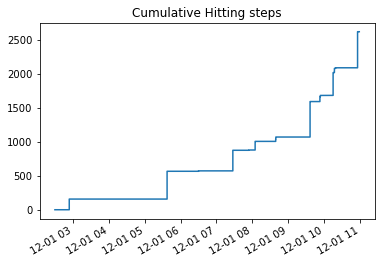

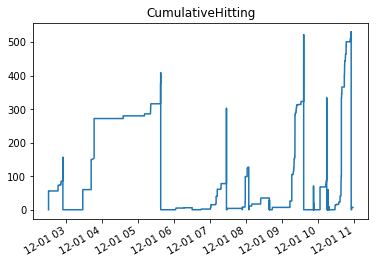

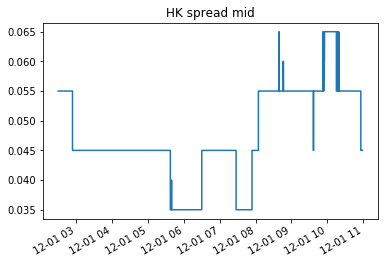

In [37]:
data['CumulativeHittingRaw'].plot()
plt.title('Cumulative Hitting raw')
plt.show()
data['CumulativeHittingSteps'].plot()
plt.title('Cumulative Hitting steps')
plt.show()
data['CumulativeHitting'].plot()
plt.title('CumulativeHitting')
plt.show()

data['mid'].plot()
plt.title('HK spread mid')
plt.show()



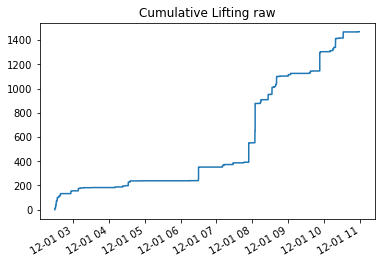

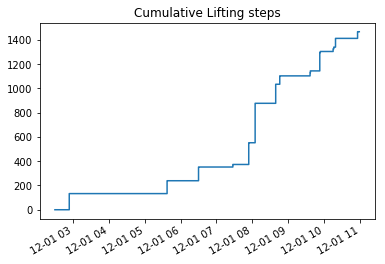

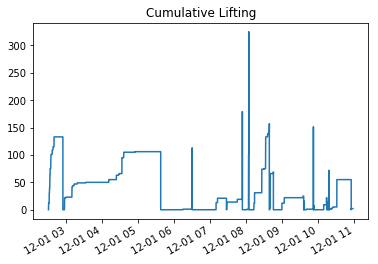

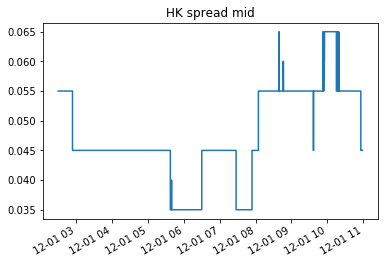

In [38]:
data['CumulativeLiftingRaw'].plot()
plt.title('Cumulative Lifting raw')
plt.show()
data['CumulativeLiftingSteps'].plot()
plt.title('Cumulative Lifting steps')
plt.show()
data['CumulativeLifting'].plot()
plt.title('Cumulative Lifting')
plt.show()

data['mid'].plot()
plt.title('HK spread mid')
plt.show()

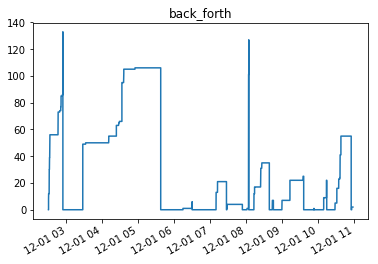

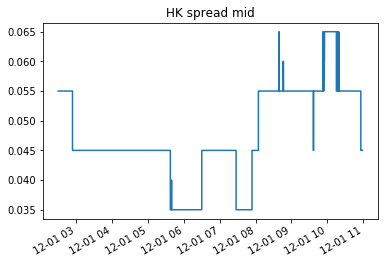

In [39]:


data['back_forth'].plot()
plt.title('back_forth')
plt.show()

data['mid'].plot()
plt.title('HK spread mid')
plt.show()

In [40]:
data['back_forth'].drop(0)
plt.hist(data['back_forth'], bins=40)
plt.title('back_forth')
plt.show()

ValueError: labels [0] not contained in axis

In [ ]:
data['mid'].plot()
plt.title('HK spread mid')
plt.show()

data['CumulativeHitting'].plot()
plt.title('CumulativeHitting')
plt.show()

data['CumulativeLifting'].plot()
plt.title('Cumulative Lifting')
plt.show()


data['back_forth'].plot()
plt.title('back_forth')
plt.show()

plt.hist(data['back_forth'], bins=20)
plt.title('back_forth')
plt.show()
